In [22]:
import pandas as pd
import numpy as np
import re

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [23]:
fake = pd.read_csv("Fake.csv", encoding="latin1")
true = pd.read_csv("True.csv", encoding="latin1")

print("Fake shape:", fake.shape)
print("True shape:", true.shape)

Fake shape: (23481, 4)
True shape: (21417, 4)


In [24]:
fake["label"] = 0
true["label"] = 1

data = pd.concat([fake, true], axis=0)

print(data["label"].value_counts())

label
0    23481
1    21417
Name: count, dtype: int64


In [25]:
data = data[["text", "label"]]
data.head()

,text,label
0,Donald Trump just couldn t wish all Americans ...,0
1,House Intelligence Committee Chairman Devin Nu...,0
2,"On Friday, it was revealed that former Milwauk...",0
3,"On Christmas day, Donald Trump announced that ...",0
4,Pope Francis used his annual Christmas Day mes...,0


In [26]:
def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^a-zA-Z ]', '', text)
    return text

data["text"] = data["text"].apply(clean_text)

In [27]:
X = data["text"]
y = data["label"]

In [28]:
vectorizer = TfidfVectorizer(max_features=5000)

X = vectorizer.fit_transform(X)

In [29]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [30]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [31]:
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.9893095768374165


In [32]:
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4733
           1       0.99      0.99      0.99      4247

    accuracy                           0.99      8980
   macro avg       0.99      0.99      0.99      8980
weighted avg       0.99      0.99      0.99      8980

[[4681   52]
 [  44 4203]]


In [33]:
def predict_news(news):
    news = clean_text(news)
    vector = vectorizer.transform([news])
    prediction = model.predict(vector)

    if prediction[0] == 0:
        return "Fake News"
    else:
        return "Real News"

In [34]:
sample = "The government announced new economic reforms today."
print(predict_news(sample))

Fake News


In [35]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4733
           1       0.99      0.99      0.99      4247

    accuracy                           0.99      8980
   macro avg       0.99      0.99      0.99      8980
weighted avg       0.99      0.99      0.99      8980



In [36]:
print(confusion_matrix(y_test, y_pred))

[[4681   52]
 [  44 4203]]


In [37]:
data["word_count"] = data["text"].apply(lambda x: len(x.split()))

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

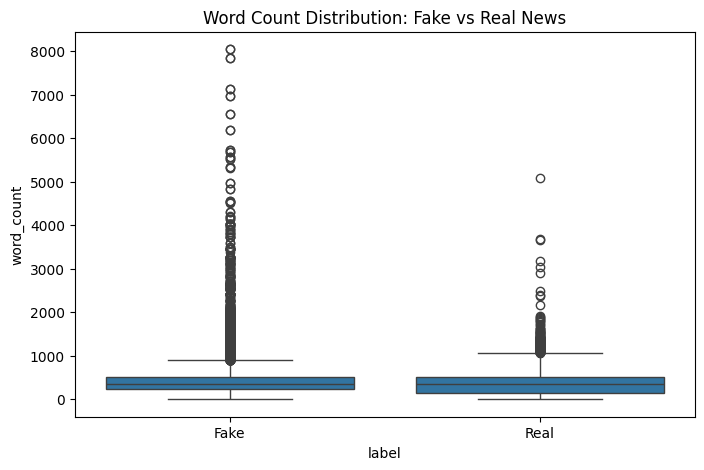

In [39]:
plt.figure(figsize=(8,5))
sns.boxplot(x="label", y="word_count", data=data)
plt.xticks([0,1], ["Fake", "Real"])
plt.title("Word Count Distribution: Fake vs Real News")
plt.show()

In [40]:
import pickle

pickle.dump(model, open("model.pkl", "wb"))

pickle.dump(vectorizer, open("vectorizer.pkl", "wb"))

In [41]:
from google.colab import files
files.download("model.pkl")
files.download("vectorizer.pkl")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>